# Sagemaker Project 3 Retail XGBoost

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

In [2]:
# import the csv files using pandas 
feature = pd.read_csv('file:///Users/vjovanovic/Desktop/SageMaker/3. Retail Sales Prediction/Features_data_set.csv')
sales = pd.read_csv('file:///Users/vjovanovic/Desktop/SageMaker/3. Retail Sales Prediction/sales_data_set.csv')
stores = pd.read_csv('file:///Users/vjovanovic/Desktop/SageMaker/3. Retail Sales Prediction/stores_data_set.csv')

Use info and describe to individually explore the 3 dataframes
What is the maximum fuel price? and maximum unemployment numbers?
What is the average size of the stores?

In [3]:
feature.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [4]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [5]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [19]:
sales.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,month
0,1,1,2010-05-02,24924.50,False,5
1,1,1,2010-12-02,46039.49,True,12
2,1,1,2010-02-19,41595.55,False,2
3,1,1,2010-02-26,19403.54,False,2
4,1,1,2010-05-03,21827.90,False,5


In [44]:
sales['Date']=pd.to_datetime(sales['Date'])
feature['Date'] = pd.to_datetime(feature['Date'])

In [42]:
sales['month'] = pd.DatetimeIndex(sales['Date']).month
sales = sales.drop('month', axis=1)
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-05-10,628.10,False
421567,45,98,2012-12-10,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [46]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [25]:
grouped_sales_by_month = sales.groupby('month').mean()

In [28]:
grouped_sales_by_month = grouped_sales_by_month.reset_index()

In [29]:
grouped_sales_by_month

,month,Store,Dept,Weekly_Sales,IsHoliday
0,1,22.198252,44.119924,14503.308110,0.000000
1,2,22.158879,44.297403,16026.823127,0.000000
2,3,22.190748,44.188771,15631.676728,0.000000
3,4,22.187588,44.176295,15638.149799,0.000000
4,5,22.190140,44.235542,15850.122787,0.000000
5,6,22.236117,44.433952,16258.141930,0.000000
6,7,22.233140,44.347376,15563.149206,0.077801
7,8,22.244225,44.309978,16012.023938,0.000000
8,9,22.209823,44.198937,15378.844836,0.077033
9,10,22.197266,44.204544,15728.044488,0.154902


<AxesSubplot:xlabel='month', ylabel='Weekly_Sales'>

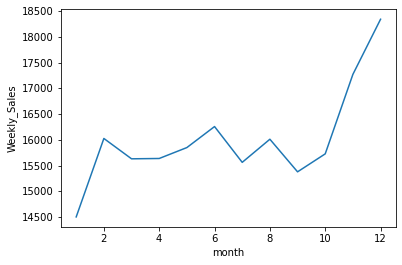

In [32]:
sns.lineplot(x="month", y="Weekly_Sales",data=grouped_sales_by_month)

In [92]:
df = pd.merge(sales, feature, on = ['Store','Date','IsHoliday'])

In [47]:
#Pišem funkciju koja izvlači godinu iz datuma, pa onda za mesec

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [53]:
x='2010-05-02'
str(x).split('-')[0]

'2010'

In [59]:
def get_month(x):
    return str(x).split('-')[1]

In [60]:
def get_year(x):
    return str(x).split('-')[0]

In [61]:
df['Year']=df['Date'].apply(get_year)

<AxesSubplot:xlabel='Year', ylabel='Weekly_Sales'>

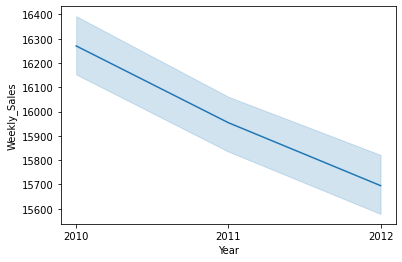

In [63]:
sns.lineplot(x="Year", y="Weekly_Sales",data=df)

In [64]:
df['month']=df['Date'].apply(get_month)

<AxesSubplot:xlabel='month', ylabel='Weekly_Sales'>

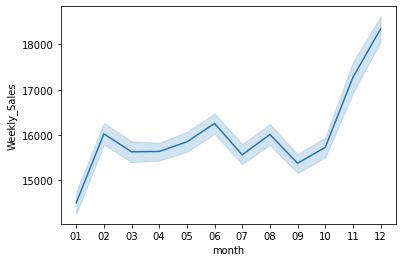

In [65]:
sns.lineplot(x="month", y="Weekly_Sales",data=df)

<AxesSubplot:>

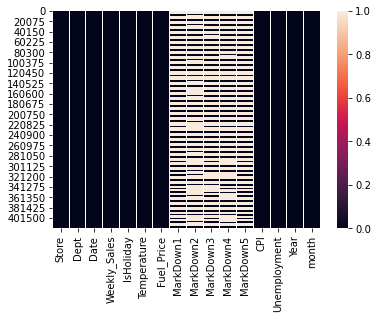

In [66]:
sns.heatmap(df.isnull())

In [67]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Year                 0
month                0
dtype: int64

In [68]:
df=df.fillna(0)

In [69]:
df.duplicated().sum()

0

In [93]:
df['IsHoliday']=df['IsHoliday'].apply(lambda x: 1 if x==True else 0)

In [94]:
df.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,0.070358,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,0.255750,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,0.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,0.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,0.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,0.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,1.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [73]:
df = pd.merge(df, stores, on = ['Store'], how = 'left')

In [84]:
#Različite agregacije po indeksu
#gledamo akcije u proseku za mesec
result_md = pd.pivot_table(df, values = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], columns = ['IsHoliday'], index = ['month', 'Store','Dept'],
                    aggfunc={'MarkDown1' : np.mean,'MarkDown2' : np.mean, 'MarkDown3' : np.mean, 'MarkDown4' : np.mean, 'MarkDown5' : np.mean})
result_md

MarkDown1    MarkDown2   MarkDown3   MarkDown4 MarkDown5
IsHoliday                   1            1           1           1         1
month Store Dept                                                            
01    1     1     1657.383000  1192.780000   49.063000  111.345000  1203.263
            2     1657.383000  1192.780000   49.063000  111.345000  1203.263
            3     1657.383000  1192.780000   49.063000  111.345000  1203.263
            4     1657.383000  1192.780000   49.063000  111.345000  1203.263
            5     1657.383000  1192.780000   49.063000  111.345000  1203.263
...                       ...          ...         ...         ...       ...
12    45    93     998.999091  4003.601818  278.079091  165.643636   953.080
            94     998.999091  4003.601818  278.079091  165.643636   953.080
            95     998.999091  4003.601818  278.079091  165.643636   953.080
            97     998.999091  4003.601818  278.079091  165.643636   953.080
            98     998.999091  4003.601818  278.079091  165.643636   953.080

[38104 rows x 5 columns]

In [81]:
result= pd.pivot_table(df, values = 'Weekly_Sales', columns = ['Type'], index = ['Date', 'Store'],
                    aggfunc= np.mean)
result

Type                         A             B             C
Date       Store                                          
2010-01-10 1      19908.623288           NaN           NaN
           2      25738.597606           NaN           NaN
           3               NaN   5786.840323           NaN
           4      25955.225634           NaN           NaN
           5               NaN   4424.658125           NaN
...                        ...           ...           ...
2012-12-10 41     19852.746056           NaN           NaN
           42              NaN           NaN  12247.598000
           43              NaN           NaN  12903.535833
           44              NaN           NaN   6255.483889
           45              NaN  11128.247879           NaN

[6435 rows x 3 columns]

In [98]:
#Različite agregacije po indeksu
#gledamo akcije u proseku za dan
result_md_dan = pd.pivot_table(df, values = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], columns = ['IsHoliday'], index = ['Date', 'Store','Dept'],
                    aggfunc={'MarkDown1' : np.mean,'MarkDown2' : np.mean, 'MarkDown3' : np.mean, 'MarkDown4' : np.mean, 'MarkDown5' : np.mean})
result_md_dan

MarkDown1     MarkDown2     MarkDown3     MarkDown4      \
IsHoliday                     0   1         0   1         0   1         0   1   
Date       Store Dept                                                           
2011-02-12 1     1      5629.51 NaN      68.0 NaN   1398.11 NaN   2084.64 NaN   
                 2      5629.51 NaN      68.0 NaN   1398.11 NaN   2084.64 NaN   
                 3      5629.51 NaN      68.0 NaN   1398.11 NaN   2084.64 NaN   
                 4      5629.51 NaN      68.0 NaN   1398.11 NaN   2084.64 NaN   
                 5      5629.51 NaN      68.0 NaN   1398.11 NaN   2084.64 NaN   
...                         ...  ..       ...  ..       ...  ..       ...  ..   
2012-12-10 45    93     1956.28 NaN       NaN NaN      7.89 NaN    599.32 NaN   
                 94     1956.28 NaN       NaN NaN      7.89 NaN    599.32 NaN   
                 95     1956.28 NaN       NaN NaN      7.89 NaN    599.32 NaN   
                 97     1956.28 NaN       NaN NaN      7.89 NaN    599.32 NaN   
                 98     1956.28 NaN       NaN NaN      7.89 NaN    599.32 NaN   

                      MarkDown5      
IsHoliday                     0   1  
Date       Store Dept                
2011-02-12 1     1     20475.32 NaN  
                 2     20475.32 NaN  
                 3     20475.32 NaN  
                 4     20475.32 NaN  
                 5     20475.32 NaN  
...                         ...  ..  
2012-12-10 45    93     3990.54 NaN  
                 94     3990.54 NaN  
                 95     3990.54 NaN  
                 97     3990.54 NaN  
                 98     3990.54 NaN  

[151432 rows x 10 columns]

In [96]:
result_md_dan.describe()

MarkDown1                    MarkDown2                 \
IsHoliday              0             1              0              1   
count      138739.000000  11942.000000  100526.000000   10722.000000   
mean         7332.984933   6240.733956    2298.528959   13048.763547   
std          8436.950798   6271.189481    5548.867501   23205.433537   
min             0.270000      2.800000    -265.760000      -9.980000   
25%          2344.650000    531.090000      40.480000      47.960000   
50%          5369.610000   5140.440000     180.020000    1447.260000   
75%          9173.970000  10155.750000    1407.400000   11778.680000   
max         88646.760000  36778.650000   45971.430000  104519.540000   

               MarkDown3                     MarkDown4                \
IsHoliday              0              1              0             1   
count      125635.000000   11456.000000  123997.000000  10970.000000   
mean          195.831724   15077.548736    3384.219730   3371.283148   
std          1102.189294   29865.571239    6385.681355   5121.189881   
min           -29.100000       0.450000       0.220000      3.000000   
25%             4.590000      39.660000     536.080000    106.240000   
50%            21.380000     118.160000    1523.110000   1009.780000   
75%            92.360000     326.680000    3572.950000   4361.360000   
max         25959.980000  141630.610000   67474.850000  29483.810000   

               MarkDown5                
IsHoliday              0             1  
count      139441.000000  11991.000000  
mean         4722.908034   3536.647067  
std          6155.436006   2669.602227  
min           153.040000    135.160000  
25%          1904.050000   1508.560000  
50%          3402.660000   2737.170000  
75%          5588.470000   5266.900000  
max        108519.280000  11100.550000

In [103]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-05-02,50605.27,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-05-02,13740.12,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-05-02,39954.04,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-05-02,32229.38,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [105]:
kor = df.drop(columns=['Store']).corr()

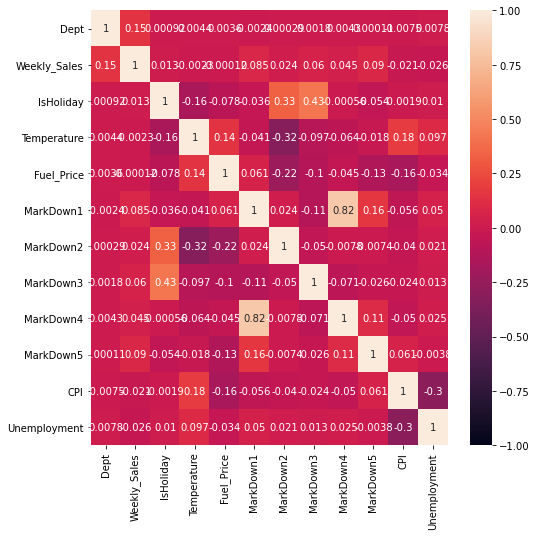

In [109]:
plt.figure(figsize = (8,8))
sns.heatmap(kor, vmin=-1, vmax=1, annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'Dept'}>,
        <AxesSubplot:title={'center':'Weekly_Sales'}>,
        <AxesSubplot:title={'center':'IsHoliday'}>],
       [<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Fuel_Price'}>,
        <AxesSubplot:title={'center':'MarkDown1'}>,
        <AxesSubplot:title={'center':'MarkDown2'}>],
       [<AxesSubplot:title={'center':'MarkDown3'}>,
        <AxesSubplot:title={'center':'MarkDown4'}>,
        <AxesSubplot:title={'center':'MarkDown5'}>,
        <AxesSubplot:title={'center':'CPI'}>],
       [<AxesSubplot:title={'center':'Unemployment'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

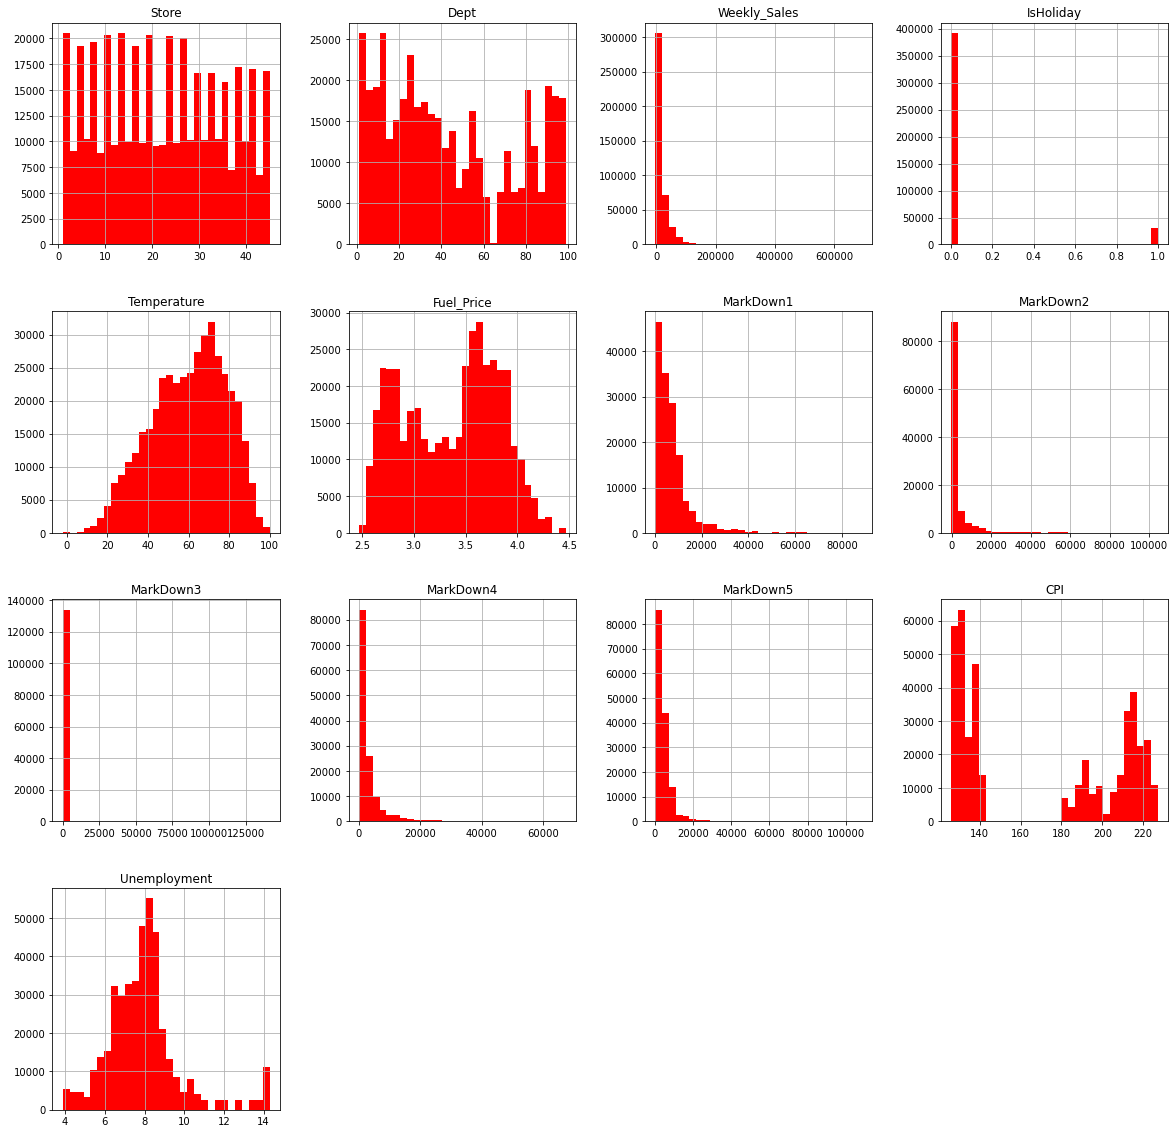

In [110]:
df.hist(bins = 30, figsize = (20,20), color = 'r')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


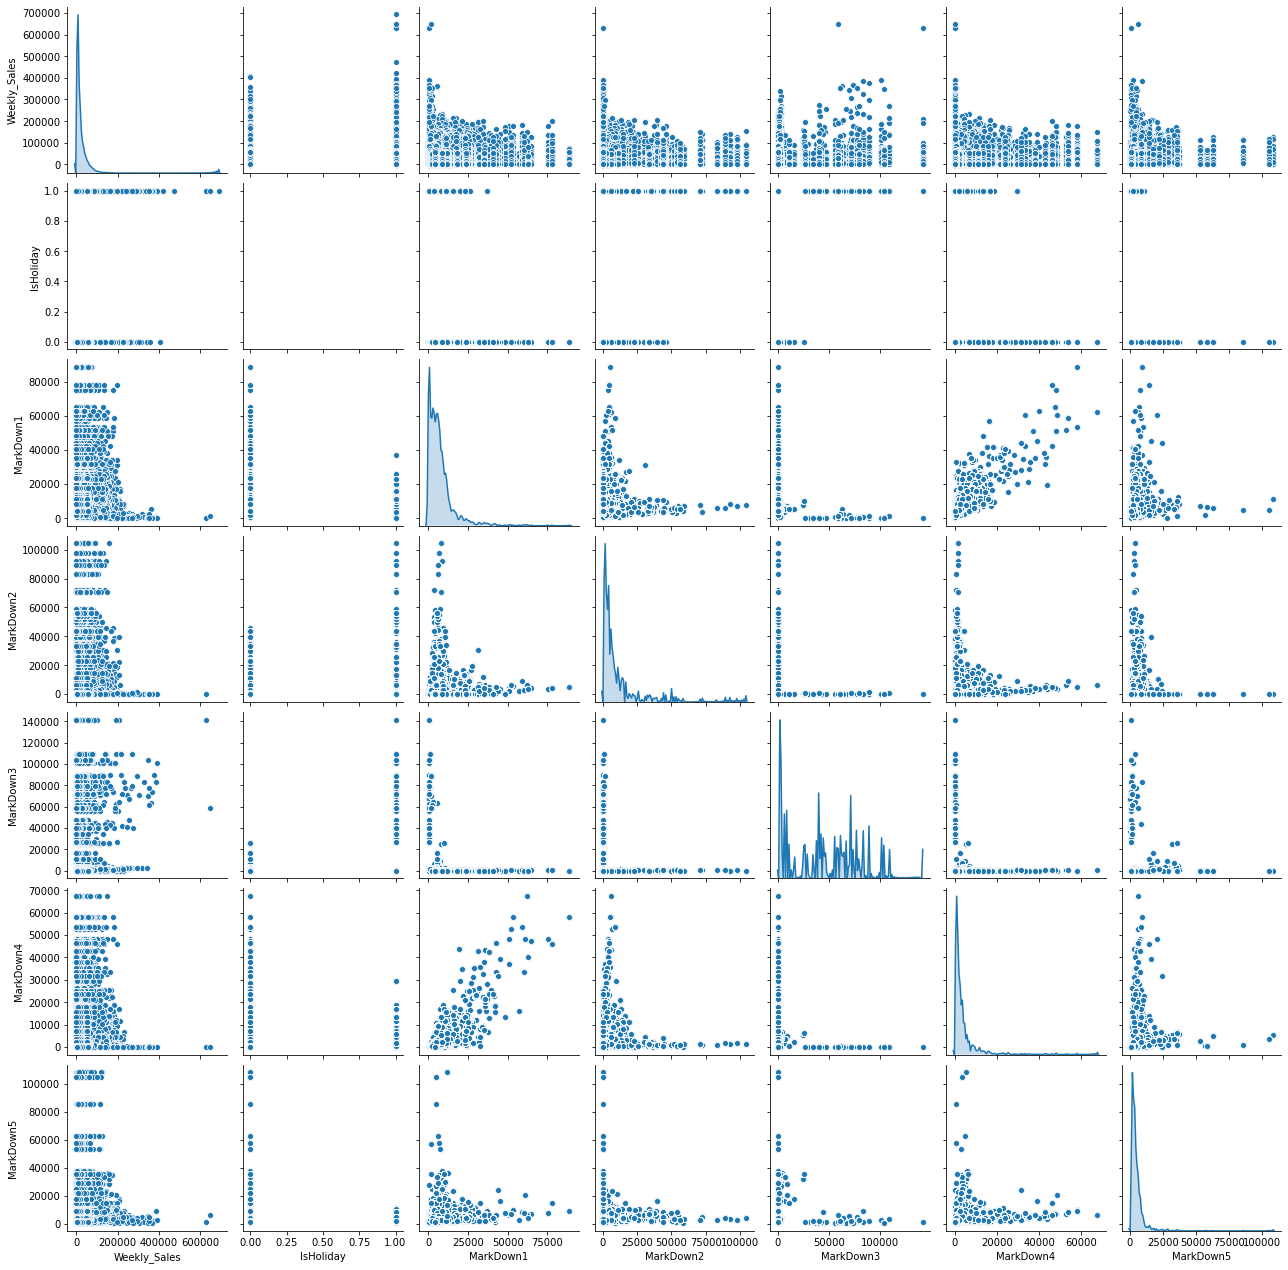

In [112]:
sns.pairplot(df[["Weekly_Sales","IsHoliday","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]], diag_kind = "kde")

In [113]:
df_dept = df.groupby('Dept').mean()
df_dept

,Store,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Dept,,,,,,,,,,,,
1,23.000000,19213.485088,0.069930,60.663782,3.358607,6855.587430,3218.965504,1349.853021,3303.858142,4435.262240,171.578394,7.999151
2,23.000000,43607.020113,0.069930,60.663782,3.358607,6855.587430,3218.965504,1349.853021,3303.858142,4435.262240,171.578394,7.999151
3,23.000000,11793.698516,0.069930,60.663782,3.358607,6855.587430,3218.965504,1349.853021,3303.858142,4435.262240,171.578394,7.999151
4,23.000000,25974.630238,0.069930,60.663782,3.358607,6855.587430,3218.965504,1349.853021,3303.858142,4435.262240,171.578394,7.999151
5,22.757366,21365.583515,0.069797,60.559367,3.365397,6855.587430,3218.965504,1349.853021,3303.858142,4435.262240,171.109374,7.978057
...,...,...,...,...,...,...,...,...,...,...,...,...
95,23.000000,69824.423080,0.069930,60.663782,3.358607,6855.587430,3218.965504,1349.853021,3303.858142,4435.262240,171.578394,7.999151
96,23.258138,15210.942761,0.069839,61.539285,3.359920,6287.967527,3119.796797,1193.855988,3212.808232,4383.115400,171.562686,7.849295
97,23.357439,14255.576919,0.069767,60.490781,3.362418,6938.862342,3260.710711,1354.717655,3361.671816,4451.886377,170.445933,8.043564


<AxesSubplot:ylabel='Dept'>

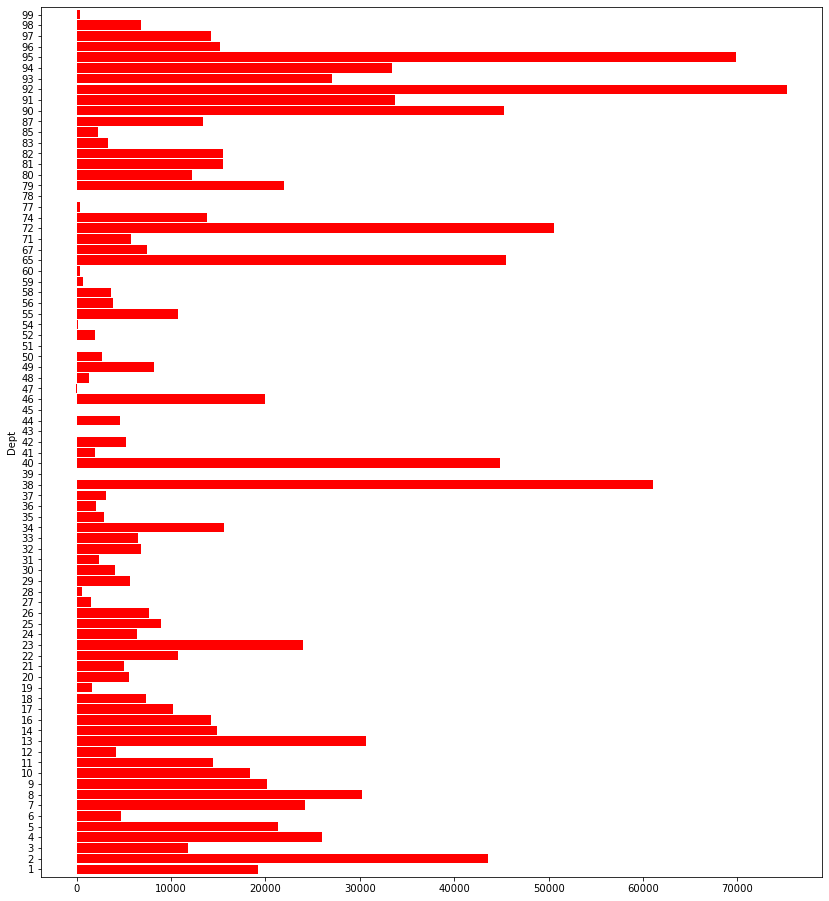

In [118]:
fig = plt.figure(figsize = (14,16))
df_dept['Weekly_Sales'].plot(kind = 'barh', color = 'r', width = 0.9)

Preparation for training

In [121]:
df = pd.merge(df, stores, on = ['Store'], how = 'left')

In [125]:
# Drop the date
df_target = df['Weekly_Sales']
df_final = df.drop(columns = ['Weekly_Sales', 'Date'])

In [126]:
df_final = pd.get_dummies(df_final, columns = ['Type', 'Store', 'Dept'], drop_first = True)

In [127]:
df_final.shape

(421570, 137)

In [128]:
df_target.shape

(421570,)

In [129]:
X = np.array(df_final).astype('float32')
y = np.array(df_target).astype('float32')

In [130]:
# reshaping the array from (421570,) to (421570, 1)
y = y.reshape(-1,1)
y.shape

(421570, 1)

In [131]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

In [134]:
# Train an XGBoost regressor model 

import xgboost as xgb
#objective - u pitanju je regresija a lost funkcija je kvadrirana greška

model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 5, n_estimators = 100)

model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
#Iz SageMaker hiperoptimizacije kreiramo novi model koji bi trebalo da da bolje rezultate

#Xgboost_regressor.set_hyperparameters(max_depth=25,
                           #objective='reg:linear',
                           #colsample_bytree = 0.3913546819101119,
                           #alpha = 1.0994354985124635,
                           #eta = 0.23848185159806115,
                           #num_round = 237
                           )

In [143]:
model_tuned = xgb.XGBRegressor(objective ='reg:squarederror', 
                         learning_rate = 0.2384, 
                         max_depth = 25, 
                         colsample_bytree=0.39135,
                         n_estimators = 100,
                               reg_alpha=1.099)

model_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.39135, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2384, max_delta_step=0, max_depth=25,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=1.099, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [135]:
result = model.score(X_test, y_test)

print("Accuracy : {}".format(result))

Accuracy : 0.8250183265826774


In [144]:
result_tuned = model_tuned.score(X_test, y_test)

print("Accuracy : {}".format(result_tuned))

Accuracy : 0.9642877033926233


In [136]:
# make predictions on the test data

y_predict = model.predict(X_test)

In [145]:
y_predict_tuned=model_tuned.predict(X_test)

In [137]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 9507.082 
MSE = 90384616.0 
MAE = 6337.1943 
R2 = 0.8250183265826774 
Adjusted R2 = 0.824256811676128


In [146]:
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_tuned)),'.3f'))
MSE = mean_squared_error(y_test, y_predict_tuned)
MAE = mean_absolute_error(y_test, y_predict_tuned)
r2 = r2_score(y_test, y_predict_tuned)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE Tuned model =',RMSE, '\nMSE Tuned model =',MSE, '\nMAE Tuned model =',MAE, '\nR2 Tuned model =', r2, '\nAdjusted R2 Tuned model=', adj_r2) 

RMSE Tuned model = 4294.967 
MSE Tuned model = 18446746.0 
MAE Tuned model = 1908.2748 
R2 Tuned model = 0.9642877033926233 
Adjusted R2 Tuned model= 0.9641322845668542


    # Sagemaker deployment

In [139]:
# Convert the array into dataframe in a way that target variable is set as the first column and followed by feature columns
# This is because sagemaker built-in algorithm expects the data in this format.

train_data = pd.DataFrame({'Target': y_train[:,0]})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]

In [141]:
train_data.head()
train_data.shape

(358334, 138)

In [142]:
val_data = pd.DataFrame({'Target':y_val[:,0]})
for i in range(X_val.shape[1]):
    val_data[i] = X_val[:,i]

In [ ]:
# save train_data and validation_data as csv files.

train_data.to_csv('train.csv', header = False, index = False)
val_data.to_csv('validation.csv', header = False, index = False)

In [ ]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3

# Create a sagemaker session
sagemaker_session = sagemaker.Session()

#S 3 bucket and prefix that we want to use
# default_bucket - creates a Amazon S3 bucket to be used in this session
bucket = 'sagemaker-practical-3'
prefix = 'XGBoost-Regressor'
key = 'XGBoost-Regressor'
#Roles give learning and hosting access to the data
#This is specified while opening the sagemakers instance in "Create an IAM role"
role = sagemaker.get_execution_role()

In [ ]:
# read the data from csv file and then upload the data to s3 bucket

with open('validation.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training

    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation', key)).upload_fileobj(f)
# Let's print out the validation data location in s3
s3_validation_data = 's3://{}/{}/validation/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_validation_data))b

In [ ]:
# creates output placeholder in S3 bucket to store the output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

In [ ]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the XGBoost container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session

from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'xgboost','0.90-2') # Latest version of XGboost

In [ ]:
# Specify the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

# Recall that XGBoost works by combining an ensemble of weak models to generate accurate/robust results. 
# The weak models are randomized to avoid overfitting

# num_round: The number of rounds to run the training.


# Alpha: L1 regularization term on weights. Increasing this value makes models more conservative.

# colsample_by_tree: fraction of features that will be used to train each tree.

# eta: Step size shrinkage used in updates to prevent overfitting. 
# After each boosting step, eta parameter shrinks the feature weights to make the boosting process more conservative.


Xgboost_regressor1 = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.m5.2xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)

#We can tune the hyper-parameters to improve the performance of the model

Xgboost_regressor1.set_hyperparameters(max_depth = 10,
                           objective = 'reg:linear',
                           colsample_bytree = 0.3,
                           alpha = 10,
                           eta = 0.1,
                           num_round = 100
                           )



In [ ]:
# Creating "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_validation_data, content_type='csv',s3_data_type = 'S3Prefix')


data_channels = {'train': train_input,'validation': valid_input}


Xgboost_regressor1.fit(data_channels)

# Deploy

In [ ]:
# Deploy the model to perform inference 

Xgboost_regressor = Xgboost_regressor1.deploy(initial_instance_count = 1, instance_type = 'ml.m5.2xlarge'

In [ ]:
'''
Content type over-rides the data that will be passed to the deployed model, since the deployed model expects data
in text/csv format, we specify this as content -type.

Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content
type

Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html
'''
from sagemaker.predictor import csv_serializer, json_deserializer

Xgboost_regressor.content_type = 'text/csv'
Xgboost_regressor.serializer = csv_serializer
Xgboost_regressor.deserializer = None

In [ ]:
# making prediction po batchevima, multiplikovati komandu

predictions1 = Xgboost_regressor.predict(X_test[0:10000])

In [ ]:
# custom code to convert the values in bytes format to array

def bytes_2_array(x):
    
    # makes entire prediction as string and splits based on ','
    l = str(x).split(',')
    
    # Since the first element contains unwanted characters like (b,',') we remove them
    l[0] = l[0][2:]
    #same-thing as above remove the unwanted last character (')
    l[-1] = l[-1][:-1]
    
    # iterating through the list of strings and converting them into float type
    for i in range(len(l)):
        l[i] = float(l[i])
        
    # converting the list into array
    l = np.array(l).astype('float32')
    
    # reshape one-dimensional array to two-dimensional array
    return l.reshape(-1,1)
    

In [ ]:
predicted_values_1 = bytes_2_array(predictions1)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, predicted_values)),'.3f'))
MSE = mean_squared_error(y_test, predicted_values)
MAE = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

In [ ]:
# Delete the end-point

Xgboost_regressor.delete_endpoint()